# 50 mV Pump, 20 mV Probe

In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 1 mili

In [96]:
1/(5.35e-3*2)

93.45794392523365

In [97]:
5.35e-3

0.00535

In [98]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [99]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [100]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [101]:
samp_freq = int(sol[751000])

In [102]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [103]:
sam = int(samp_freq * 5.35e-3) 

In [104]:
samp_freq

125760000

In [105]:
125760000

125760000

In [106]:
sam

672816

In [107]:
AWG_Settings_1mili= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':125760000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\1mili'
}

In [108]:
M8190A = VisaR(AWG_Settings_1mili,60000)

KeyboardInterrupt: 

In [ ]:
Initialization(M8190A,AWG_Settings_1mili)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [ ]:
Pump_1mili = {
    'Name':'Pump_1mili',
    'Amplitude': 50,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
ProbeA_1mili = {
    'Name':'ProbeA_1mili',
    'Amplitude':20,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [ ]:
ProbeB_1mili = {
    'Name':'ProbeB_1mili',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
PulseScheme_A_1mili =  {
    'Name' : 'PulseScheme_A_1mili',
    'Pulse Scheme': [Pump_1mili,ProbeA_1mili],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1mili'
}

In [ ]:
PulseScheme_B_1mili =  {
    'Name' : 'PulseScheme_B_1mili',
    'Pulse Scheme': [ProbeB_1mili,ProbeB_1mili],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1mili'
}

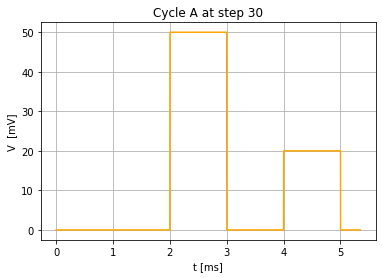

In [ ]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1mili,30,step,5.35,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1mili.jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_1mili = Sweeping_Single_List_File_teil(PulseScheme_A_1mili,30,5.35,sam,0,30,AWG_Settings_1mili,'A')[0]

In [ ]:
sweeping_run_b_1mili = Sweeping_Single_List_File_teil(PulseScheme_B_1mili,30,5.35,sam,0,30,AWG_Settings_1mili,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_1mili_125760000GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1mili, k)


with open(r"{dict}\cycleB_31steps_93Hz_1mili_125760000GHz.p".format(dict = PulseScheme_B_1mili['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1mili, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_1mili_125760000GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "rb") as j:
    sweeping_runa_100micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_1mili_125760000GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "rb") as f:
    sweeping_runb_100micro= pickle.load(f)

In [ ]:
sweeping_run_a_1mili['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_1mili['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
Sequence_File(M8190A,sweeping_runa_100micro['Pulse File Location, at step 30'],sweeping_runb_100micro['Pulse File Location, at step 30'],8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1mili,sweeping_run_b_1mili,PulseScheme_A_1mili['Measurement file Path'],Lock_In_Settings,1)

Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 0 is 2.7373247179799987 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 1 is 2.772382636970022 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 2 is 2.819014840230653 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 3 is 2.868739685437294 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 4 is 2.897289900469133 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and t

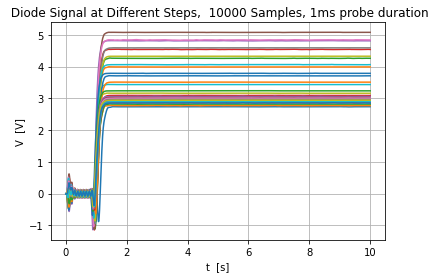

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1ms probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5 35ms scheme, probe duration 1 mili,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-2,2,31)

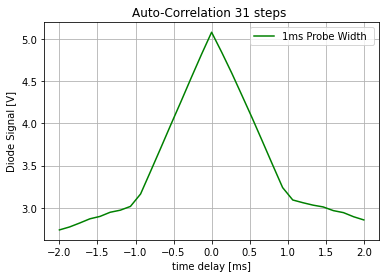

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1ms Probe Width ',color='blue')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ms]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5 35ms length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 100micro

In [4]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005

In [5]:
cycle_time # 0.005556

0.005

In [6]:
cycle_time_micro = cycle_time*1e6 #micro

In [7]:
cycle_time_micro

5000.0

In [9]:
5000/625 #loop

8.0

In [ ]:
cycle_time_micro/111111

0.05000005000005

In [ ]:
5556*1e-6

0.005556

In [ ]:
1/(0.005556*2)

89.99280057595392

In [ ]:
5556/926#loop

6.0

In [12]:
sol2_100micro = Gran_find(3071999990,3072000010,6.25e-6)
np.where(sol2_100micro != 0)

(array([10], dtype=int64),)

In [ ]:
sol[10]

3072000000.0

In [ ]:
3072000000*6.25e-6

In [3]:
np.lcm(3072000000, 48)

3072000000

In [ ]:
np.lcm(5556, 6)

5556

In [6]:
np.gcd(3072000000, 48)

48

In [ ]:
np.gcd(5556, 6)

6

In [ ]:
filter()

In [ ]:
divisible  

In [13]:
125e6 * 5e-3

625000.0

In [ ]:
125e6 * 5e-3

625000.0

In [ ]:
for i in range(1,min(num1,num2)+1):
  if num1%i == num2%i == 0:
    divisor = i
    print(divisor)

In [11]:
sol_100micro = Gran_find(3060000000,3080000000,9.26e-6)
np.where(sol_100micro != 0)

(array([], dtype=int64),)

In [16]:
sol_100micro[10]

3072000000.0

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [2]:
625000/48

13020.833333333334

In [4]:
625024/64

9766.0

In [6]:
625024 % 64 == 0

True

In [5]:
625024/48

13021.333333333334

In [3]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 48 are : 
1
2
3
4
6
8
12
16
24
48


In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
625024/64

9766.0

In [ ]:
3072000000

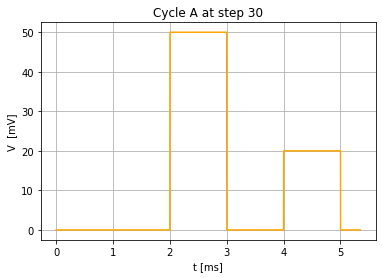

In [ ]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_100micro,30,step,5.35,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1mili.jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
5e-3

0.005

In [ ]:
48*20

960

In [ ]:
4704/5.35e-3

879252.3364485982

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-6)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

# Here

In [3]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

divide cycle time in N parts

In [10]:
interval = (cycle_time *1e6) /10

In [30]:
cycle_time *1e6

5555.555555555556

In [31]:
interval

555.5555555555555

In [36]:
interval*10

5555.555555555556

In [12]:
samples = int(3072000010 * (interval *1e-6))

In [13]:
samples

1706666

In [14]:
def Granularity(samples):
    """ This function takes the number of samples and converts it to the closest number that satisfies the granularity
        of 48  
    """
    
    x = int((samples /48)+1)* 48
    
    return x

In [18]:
sam = Granularity(samples)

In [19]:
sam

1706688

In [67]:
sam/48

40000.0

In [15]:
Granularity(samples)

1706688

In [20]:
AWG_Settings_100micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\100micro'
}

In [41]:
M8190A = VisaR(AWG_Settings_100micro,60000)

In [4]:
Initialization(M8190A,AWG_Settings_100micro)

Instruments Sampling Frecuency set to 3.07200000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [25]:
Pump_100micro = {
    'Name':'Pump_100micro',
    'Amplitude': 50,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [26]:
ProbeA_100micro = {
    'Name':'ProbeA_100micro',
    'Amplitude':20,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [27]:
ProbeB_100micro= {
    'Name':'ProbeB_100micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [28]:
PulseScheme_A_100micro =  {
    'Name' : 'PulseScheme_A_100micro',
    'Pulse Scheme': [Pump_100micro,ProbeA_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100micro'
}

In [29]:
PulseScheme_B_100micro =  {
    'Name' : 'PulseScheme_B_100micro',
    'Pulse Scheme': [ProbeB_100micro,ProbeB_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100micro'
}

In [33]:
interval

555.5555555555555

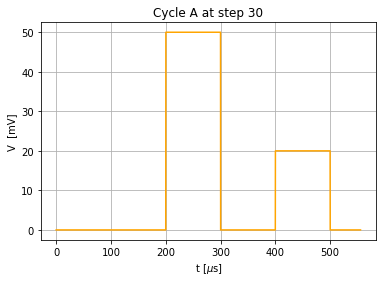

In [32]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_100micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100micro  mod 90.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

In [37]:
sweeping_run_a_100micro = Sweeping_Single_List_File_teil(PulseScheme_A_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'A')[0]

In [38]:
sweeping_run_b_100micro = Sweeping_Single_List_File_teil(PulseScheme_B_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'B')[0]

In [39]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_90Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100micro, k)


with open(r"{dict}\cycleB_31steps_90Hz_10micro_.p".format(dict = PulseScheme_B_100micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as j:
    sweeping_runa_100microicro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as f:
    sweeping_runb_100micro= pickle.load(f)

In [ ]:
sweeping_run_a_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [43]:
10

NameError: name 'loop' is not defined

In [45]:
Sequence_File(M8190A,sweeping_run_a_100micro['Pulse File Location, at step 30'],sweeping_run_b_100micro['Pulse File Location, at step 30'],10)

Sequence loaded with the following segment data "1,10,0,1,0,1706687,2,10,0,1,0,1706687" and the advancement method is COND


0

In [53]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [55]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [56]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100micro,sweeping_run_b_100micro,PulseScheme_A_100micro['Measurement file Path'],Lock_In_Settings,10)

Sequence loaded with the following segment data "1,10,0,1,0,1706687,2,10,0,1,0,1706687" and the advancement method is COND
Average Value for measurement at step 0 is 2.421411230456561 V
Sequence loaded with the following segment data "1,10,0,1,0,1706687,2,10,0,1,0,1706687" and the advancement method is COND
Average Value for measurement at step 1 is 2.4213757585550733 V
Sequence loaded with the following segment data "1,10,0,1,0,1706687,2,10,0,1,0,1706687" and the advancement method is COND
Average Value for measurement at step 2 is 2.420194661682494 V
Sequence loaded with the following segment data "1,10,0,1,0,1706687,2,10,0,1,0,1706687" and the advancement method is COND
Average Value for measurement at step 3 is 2.419041049664678 V
Sequence loaded with the following segment data "1,10,0,1,0,1706687,2,10,0,1,0,1706687" and the advancement method is COND
Average Value for measurement at step 4 is 2.4188185868111827 V
Sequence loaded with the following segment data "1,10,0,1,0,1706687,

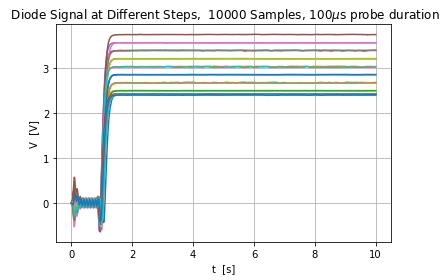

In [57]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 100 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [58]:
time_delay = np.linspace(-200,200,31)

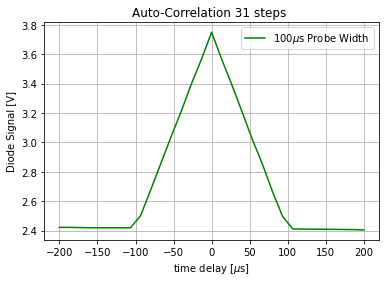

In [59]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [ ]:
125000000

In [ ]:
1/0.01

100.0

In [ ]:
0.0055*2

0.011

In [ ]:
1/(5.35e-3*2)

93.45794392523365

In [ ]:
5.35e-3

0.00535

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
div_test(3072000000,6.25e-6)

True

In [ ]:
sol = Gran_find(3071999990,3072000010,6.25e-6)

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
def Mult_find_1GHz(time_length):
    """ goes from lowest Sr to 1GHz
    
    
    
    """
    Sampling_freq_range = np.arange(125000000,1000000000,1)
    sol = np.array((len(Sampling_freq_range)))
    for j,i in (Sampling_freq_range,range(0,len(Sampling_freq_range))):
        if ((j * time_length) % 48 == 0  ):
            sol[i] = j
        else:
            sol[i] = 0

    return sol   

In [ ]:
Mult_find_1GHz(0.005)

ValueError: too many values to unpack (expected 2)

In [ ]:
5e-3

0.005

In [ ]:
48*20

960

In [ ]:
4704/5.35e-3

879252.3364485982

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

# 10 micro

In [25]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 5000 are : 
1
2
4
5
8
10
20
25
40
50
100
125
200
250
500
625
1000
1250
2500
5000


In [29]:
loop_micro = 5000/100

In [14]:
5000/62.5

80.0

In [5]:
62.5 * 80

5000.0

In [27]:
sam = int(3072000000*100e-6)

In [28]:
sam/48

6400.0

In [ ]:
0.0000625

In [11]:
6.25e-6

6.25e-06

90Hz

In [2]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

divide cycle time in N parts

In [3]:
cycle_micro = cycle_time *1e6

In [4]:
cycle_micro

5555.555555555556

In [5]:
loop_micro = 75

In [6]:
interval = (cycle_micro) /loop_micro

In [7]:
interval

74.07407407407408

In [8]:
interval*75

5555.555555555556

In [9]:
samples = int(3072000010 * (interval *1e-6))

In [10]:
samples

227555

In [11]:
samples/48

4740.729166666667

In [12]:
sam = Granularity(samples)

In [13]:
sam

227568

In [14]:
sam/48

4741.0

In [15]:
AWG_Settings_10micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10micro'
}

In [16]:
M8190A = VisaR(AWG_Settings_10micro,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_10micro)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [17]:
Pump_10micro = {
    'Name':'Pump_10micro',
    'Amplitude': 50,
    'Start time':20,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [18]:
ProbeA_10micro = {
    'Name':'ProbeA_10micro',
    'Amplitude':20,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [19]:
ProbeB_10micro= {
    'Name':'ProbeB_10micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [20]:
PulseScheme_A_10micro =  {
    'Name' : 'PulseScheme_A_10micro',
    'Pulse Scheme': [Pump_10micro,ProbeA_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10micro'
}

In [21]:
PulseScheme_B_10micro =  {
    'Name' : 'PulseScheme_B_10micro',
    'Pulse Scheme': [ProbeB_10micro,ProbeB_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10micro'
}

In [ ]:
93

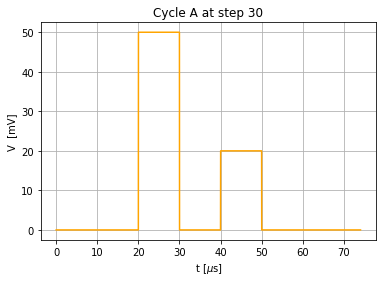

In [23]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_10micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1micro 90 hz mod 75 loop.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path']),bbox_inches='tight')

In [24]:
sweeping_run_a_10micro = Sweeping_Single_List_File_teil(PulseScheme_A_10micro,30,interval,sam,0,30,AWG_Settings_10micro,'A')[0]

In [25]:
sweeping_run_b_10micro = Sweeping_Single_List_File_teil(PulseScheme_B_10micro,30,interval,sam,0,30,AWG_Settings_10micro,'B')[0]

In [26]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_90Hz_10micro_3072000000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10micro, k)


with open(r"{dict}\cycleB_31steps_90Hz_10micro_3072000000GHz.p".format(dict = PulseScheme_B_10micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_100Hz_10micro_3072000000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as j:
    sweeping_runa_10micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_100Hz_10micro_3072000000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as f:
    sweeping_runb_10micro= pickle.load(f)

In [ ]:
sweeping_run_a_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [27]:
loop_micro

75

In [ ]:
Sequence_File(M8190A,sweeping_runa_10micro['Pulse File Location, at step 30'],sweeping_runb_10micro['Pulse File Location, at step 30'],75)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [28]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [29]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [30]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10micro,sweeping_run_b_10micro,PulseScheme_A_10micro['Measurement file Path'],Lock_In_Settings,75)

Sequence loaded with the following segment data "1,75,0,1,0,227567,2,75,0,1,0,227567" and the advancement method is COND
Average Value for measurement at step 0 is 1.7885160362927888 V
Sequence loaded with the following segment data "1,75,0,1,0,227567,2,75,0,1,0,227567" and the advancement method is COND
Average Value for measurement at step 1 is 1.788619491949546 V
Sequence loaded with the following segment data "1,75,0,1,0,227567,2,75,0,1,0,227567" and the advancement method is COND
Average Value for measurement at step 2 is 1.788558696482 V
Sequence loaded with the following segment data "1,75,0,1,0,227567,2,75,0,1,0,227567" and the advancement method is COND
Average Value for measurement at step 3 is 1.7885498167730034 V
Sequence loaded with the following segment data "1,75,0,1,0,227567,2,75,0,1,0,227567" and the advancement method is COND
Average Value for measurement at step 4 is 1.7884588584845893 V
Sequence loaded with the following segment data "1,75,0,1,0,227567,2,75,0,1,0,22

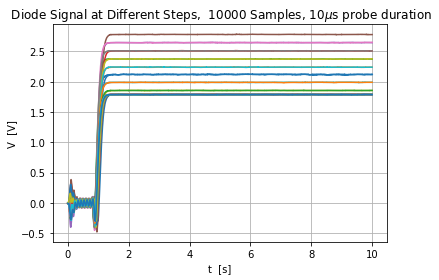

In [31]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 10 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [32]:
time_delay = np.linspace(-20,20,31)

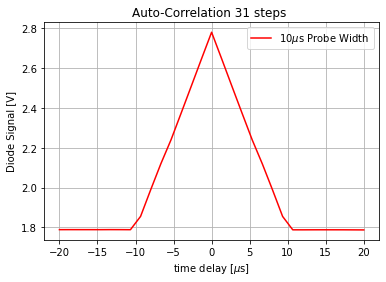

In [33]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10$\mu$s Probe Width ',color='red')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 1 micro

In [ ]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 5000 are : 
1
2
4
5
8
10
20
25
40
50
100
125
200
250
500
625
1000
1250
2500
5000


In [41]:
loop_1micro = 5000/50

In [42]:
5000/50

100.0

In [43]:
sam = int(3072000000*50e-6)

In [44]:
sam/48

3200.0

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

90Hz

In [2]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

divide cycle time in N parts

In [3]:
cycle_micro = cycle_time *1e6

In [4]:
cycle_micro

5555.555555555556

In [5]:
loop_1micro = 750

In [12]:
interval = (cycle_micro) /loop_1micro

In [13]:
interval

7.407407407407407

In [14]:
interval*75

555.5555555555555

In [15]:
samples = int(3072000010 * (interval *1e-6))

In [16]:
samples

22755

In [17]:
samples/48

474.0625

In [18]:
sam = Granularity(samples)

In [19]:
sam

22800

In [20]:
sam/48

475.0

In [21]:
AWG_Settings_1micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\1micro'
}

In [22]:
M8190A = VisaR(AWG_Settings_1micro,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_1micro)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [23]:
Pump_1micro = {
    'Name':'Pump_1micro',
    'Amplitude': 50,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [24]:
ProbeA_1micro = {
    'Name':'ProbeA_1micro',
    'Amplitude':20,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [25]:
ProbeB_1micro= {
    'Name':'ProbeB_1micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [26]:
PulseScheme_A_1micro =  {
    'Name' : 'PulseScheme_A_1micro',
    'Pulse Scheme': [Pump_1micro,ProbeA_1micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1micro'
}

In [27]:
PulseScheme_B_1micro =  {
    'Name' : 'PulseScheme_B_1micro',
    'Pulse Scheme': [ProbeB_1micro,ProbeB_1micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1micro'
}

In [ ]:
93

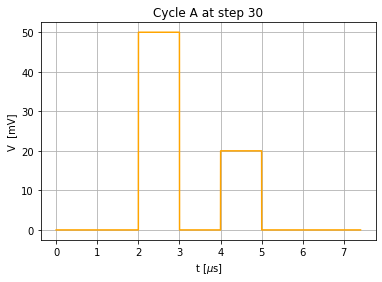

In [29]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1micro 90Hz.jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path']),bbox_inches='tight')

In [30]:
sweeping_run_a_1micro = Sweeping_Single_List_File_teil(PulseScheme_A_1micro,30,interval,sam,0,30,AWG_Settings_1micro,'A')[0]

In [31]:
sweeping_run_b_1micro = Sweeping_Single_List_File_teil(PulseScheme_B_1micro,30,interval,sam,0,30,AWG_Settings_1micro,'B')[0]

In [32]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_90Hz_1micro_3072000000.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1micro, k)


with open(r"{dict}\cycleB_31steps_90Hz_1micro_3072000000.p".format(dict = PulseScheme_B_1micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_100Hz_1micro_3072000000.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "rb") as j:
    sweeping_runa_1micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_100Hz_1micro_3072000000.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "rb") as f:
    sweeping_runb_1micro= pickle.load(f)

In [ ]:
sweeping_run_a_1micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_1micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [33]:
loop_1micro

750

In [ ]:
Sequence_File(M8190A,sweeping_runa_1micro['Pulse File Location, at step 30'],sweeping_runb_1micro['Pulse File Location, at step 30'],50)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [34]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [35]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [36]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1micro,sweeping_run_b_1micro,PulseScheme_A_1micro['Measurement file Path'],Lock_In_Settings,750)

Sequence loaded with the following segment data "1,750,0,1,0,22799,2,750,0,1,0,22799" and the advancement method is COND
Average Value for measurement at step 0 is 1.777102556560277 V
Sequence loaded with the following segment data "1,750,0,1,0,22799,2,750,0,1,0,22799" and the advancement method is COND
Average Value for measurement at step 1 is 1.7772173350183353 V
Sequence loaded with the following segment data "1,750,0,1,0,22799,2,750,0,1,0,22799" and the advancement method is COND
Average Value for measurement at step 2 is 1.7768625225284647 V
Sequence loaded with the following segment data "1,750,0,1,0,22799,2,750,0,1,0,22799" and the advancement method is COND
Average Value for measurement at step 3 is 1.7770204310002273 V
Sequence loaded with the following segment data "1,750,0,1,0,22799,2,750,0,1,0,22799" and the advancement method is COND
Average Value for measurement at step 4 is 1.7778581305080838 V
Sequence loaded with the following segment data "1,750,0,1,0,22799,2,750,0,1

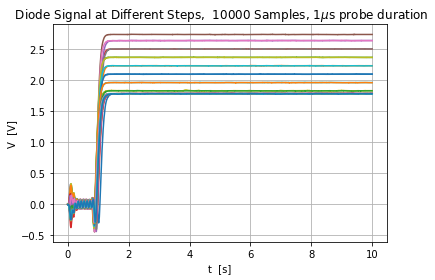

In [37]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 1 micro,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [38]:
time_delay = np.linspace(-2,2,31)

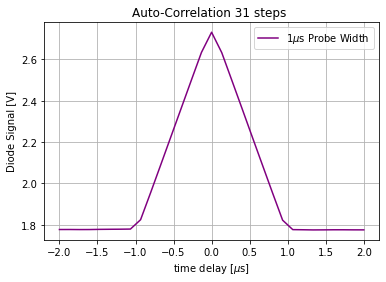

In [39]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1$\mu$s Probe Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 100nano

90Hz

In [2]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

divide cycle time in N parts

In [15]:
cycle_nano = cycle_time *1e9

In [16]:
cycle_nano

5555555.555555556

In [7]:
cycle_nano/8000

694.4444444444445

In [8]:
loop_100nano = 8000

In [10]:
interval = (cycle_nano) /loop_100nano

In [17]:
interval

694.4444444444445

In [12]:
interval*loop_100nano

5555555.555555556

In [18]:
samples = int(3072000010 * (interval *1e-9))

In [19]:
samples

2133

In [20]:
samples/48

44.4375

In [21]:
sam = Granularity(samples)

In [22]:
sam

2160

In [23]:
sam/48

45.0

In [24]:
AWG_Settings_100nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\100nano'
}

In [25]:
M8190A = VisaR(AWG_Settings_100nano,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_100nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [26]:
Pump_100nano = {
    'Name':'Pump_100nano',
    'Amplitude': 50,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [27]:
ProbeA_100nano = {
    'Name':'ProbeA_100nano',
    'Amplitude':20,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [28]:
ProbeB_100nano= {
    'Name':'ProbeB_100nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [29]:
PulseScheme_A_100nano =  {
    'Name' : 'PulseScheme_A_100nano',
    'Pulse Scheme': [Pump_100nano,ProbeA_100nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100nano'
}

In [30]:
PulseScheme_B_100nano =  {
    'Name' : 'PulseScheme_B_100nano',
    'Pulse Scheme': [ProbeB_100nano,ProbeB_100nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100nano'
}

In [ ]:
93

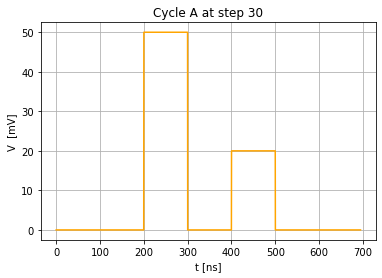

In [32]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_100nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100 nano 90 Hz mod.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path']),bbox_inches='tight')

In [33]:
sweeping_run_a_100nano = Sweeping_Single_List_File_teil(PulseScheme_A_100nano,30,interval,sam,0,30,AWG_Settings_100nano,'A')[0]

In [34]:
sweeping_run_b_100nano = Sweeping_Single_List_File_teil(PulseScheme_B_100nano,30,interval,sam,0,30,AWG_Settings_100nano,'B')[0]

In [35]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_90Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100nano, k)


with open(r"{dict}\cycleB_31steps_90Hz_100nano_.p".format(dict = PulseScheme_B_100nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as j:
    sweeping_runa_100nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as f:
    sweeping_runb_100nano= pickle.load(f)

In [ ]:
sweeping_run_a_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [36]:
loop_100nano

8000

In [ ]:
Sequence_File(M8190A,sweeping_runa_100nano['Pulse File Location, at step 30'],sweeping_runb_100nano['Pulse File Location, at step 30'],8000)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [37]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [38]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [39]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100nano,sweeping_run_b_100nano,PulseScheme_A_100nano['Measurement file Path'],Lock_In_Settings,8000)

Sequence loaded with the following segment data "1,8000,0,1,0,2159,2,8000,0,1,0,2159" and the advancement method is COND
Average Value for measurement at step 0 is 1.607058276721036 V
Sequence loaded with the following segment data "1,8000,0,1,0,2159,2,8000,0,1,0,2159" and the advancement method is COND
Average Value for measurement at step 1 is 1.6086169704782982 V
Sequence loaded with the following segment data "1,8000,0,1,0,2159,2,8000,0,1,0,2159" and the advancement method is COND
Average Value for measurement at step 2 is 1.6091729622179525 V
Sequence loaded with the following segment data "1,8000,0,1,0,2159,2,8000,0,1,0,2159" and the advancement method is COND
Average Value for measurement at step 3 is 1.6107206150775906 V
Sequence loaded with the following segment data "1,8000,0,1,0,2159,2,8000,0,1,0,2159" and the advancement method is COND
Average Value for measurement at step 4 is 1.6142312937204997 V
Sequence loaded with the following segment data "1,8000,0,1,0,2159,2,8000,0,

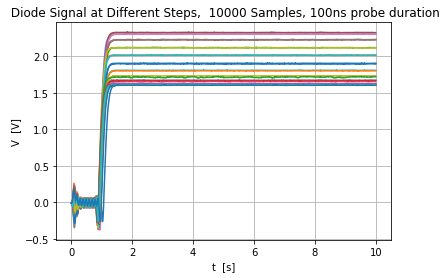

In [40]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 100 nano,31 steps, 90Hz no legend, .jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [42]:
time_delay = np.linspace(-200,200,31)

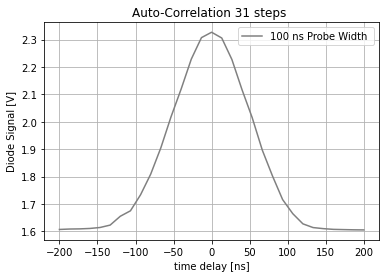

In [43]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100 ns Probe Width ',color='grey')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps 100nano 90Hz length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 10 Nano

90Hz

In [2]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

divide cycle time in N parts

In [4]:
cycle_nano = cycle_time *1e9

In [5]:
cycle_nano

5555555.555555556

In [6]:
loop_10nano = 50000

cycle_nano/loop_10nano

111.11111111111111

In [7]:
interval = (cycle_nano) /loop_10nano

In [14]:
interval

111.11111111111111

In [9]:
interval*loop_10nano

5555555.555555556

In [10]:
samples = int(3.02375e9 * (interval *1e-9))

In [11]:
samples

335

In [12]:
sam = Granularity(samples)

In [13]:
sam

336

In [117]:
interval = 1.344e-7

In [ ]:
1.1111e-7

In [165]:
samples

341

In [106]:
samples/48

4.729166666666667

In [111]:
sam =336 #2nd option

In [112]:
sam

336

In [114]:
sam/48

7.0

In [ ]:
1.25
320

50000 gives 80 mod

In [15]:
AWG_Settings_10nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3.02375e9,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10nano'
}

In [16]:
M8190A = VisaR(AWG_Settings_10nano,60000)

In [151]:
Initialization(M8190A,AWG_Settings_10nano)

Instruments Sampling Frecuency set to 3.02375000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [ ]:
M8190A.write('FREQ:RAST {a}'.format(a = ))

In [17]:
Pump_10nano = {
    'Name':'Pump_10nano',
    'Amplitude': 50,
    'Start time':20,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [18]:
ProbeA_10nano = {
    'Name':'ProbeA_10nano',
    'Amplitude':20,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [19]:
ProbeB_10nano= {
    'Name':'ProbeB_10nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [20]:
PulseScheme_A_10nano =  {
    'Name' : 'PulseScheme_A_10nano',
    'Pulse Scheme': [Pump_10nano,ProbeA_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

In [21]:
PulseScheme_B_10nano =  {
    'Name' : 'PulseScheme_B_10nano',
    'Pulse Scheme': [ProbeB_10nano,ProbeB_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

In [ ]:
93

In [135]:
interval = 111

In [ ]:
111

In [152]:
sam

336

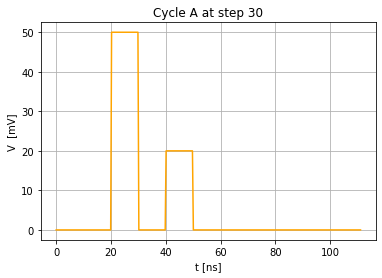

In [23]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_10nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1micro.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path']),bbox_inches='tight')

In [24]:
sweeping_run_a_10nano = Sweeping_Single_List_File_teil(PulseScheme_A_10nano,30,interval,sam,0,30,AWG_Settings_10nano,'A')[0]

In [25]:
sweeping_run_b_10nano = Sweeping_Single_List_File_teil(PulseScheme_B_10nano,30,interval,sam,0,30,AWG_Settings_10nano,'B')[0]

In [26]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_90Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10nano, k)


with open(r"{dict}\cycleB_31steps_90Hz_10nano_.p".format(dict = PulseScheme_B_10nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as j:
    sweeping_runa_10nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as f:
    sweeping_runb_10nano= pickle.load(f)

In [ ]:
sweeping_run_a_10nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_10nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [94]:
loop_10nano

50000

In [ ]:
Sequence_File(M8190A,sweeping_runa_10nano['Pulse File Location, at step 30'],sweeping_runb_10nano['Pulse File Location, at step 30'],5000)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [27]:
M8190A.write('SEQ:DEL:ALL')

12

In [155]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [28]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [29]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10nano,sweeping_run_b_10nano,PulseScheme_A_10nano['Measurement file Path'],Lock_In_Settings,50000)

Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 0 is 0.614998522082494 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 1 is 0.6163391675447847 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 2 is 0.618202305326997 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 3 is 0.619567381691892 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 4 is 0.6247735588739987 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1

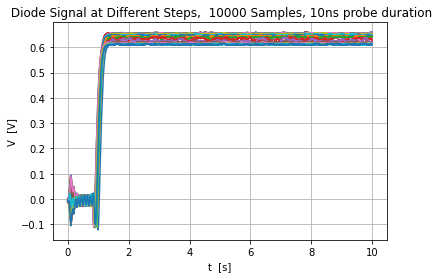

In [30]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 10 nano,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [31]:
time_delay = np.linspace(-20,20,31)

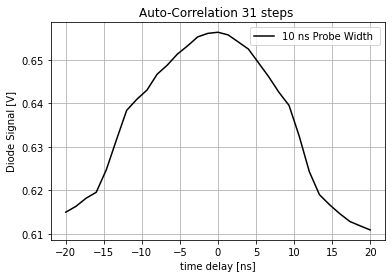

In [32]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10 ns Probe Width ',color='black')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 1 nano

In [ ]:
125000000

In [ ]:
1/0.01

100.0

In [ ]:
0.0055*2

0.011

In [ ]:
1/(5.35e-3*2)

93.45794392523365

In [ ]:
5.35e-3

0.00535

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
div_test(3072000000,6.25e-6)

True

In [ ]:
sol = Gran_find(3071999990,3072000010,6.25e-6)

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

In [ ]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 5000000 are : 
1
2
4
5
8
10
16
20
25
32
40
50
64
80
100
125
160
200
250
320
400
500
625
800
1000
1250
1600
2000
2500
3125
4000
5000
6250
8000
10000
12500
15625
20000
25000
31250
40000
50000
62500
78125
100000
125000
156250
200000
250000
312500
500000
625000
1000000
1250000
2500000
5000000


In [118]:
loop_1nano = 5000000/5000

In [119]:
loop_1nano

1000.0

In [132]:
5000*loop_1nano

5000000.0

In [ ]:
5000/50

100.0

In [120]:
sam = int(3072000000*5000e-9)

In [121]:
sam

15360

In [122]:
sam/48

320.0

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [2]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

divide cycle time in N parts

In [3]:
cycle_nano = cycle_time *1e9

In [4]:
cycle_nano

5555555.555555556

In [16]:
loop_1nano = 100000

cycle_nano/loop_1nano

55.55555555555556

In [17]:
interval = (cycle_nano) /loop_1nano

In [18]:
interval

55.55555555555556

In [19]:
interval*loop_1nano

5555555.555555556

In [20]:
samples = int(3.02375e9 * (interval *1e-9))

In [21]:
samples

167

In [22]:
sam = Granularity(samples)

In [23]:
sam

192

In [24]:
AWG_Settings_1nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3.02375e9,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\1nano'
}

In [25]:
M8190A = VisaR(AWG_Settings_1nano,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_1nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [26]:
Pump_1nano = {
    'Name':'Pump_1nano',
    'Amplitude': 50,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [27]:
ProbeA_1nano = {
    'Name':'ProbeA_1nano',
    'Amplitude':20,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [28]:
ProbeB_1nano= {
    'Name':'ProbeB_1nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [29]:
PulseScheme_A_1nano =  {
    'Name' : 'PulseScheme_A_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeA_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1nano'
}

In [30]:
PulseScheme_B_1nano =  {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [ProbeB_1nano,ProbeB_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1nano'
}

In [ ]:
93

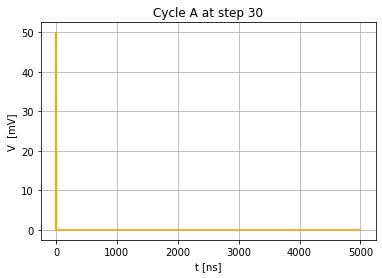

In [131]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1nano,30,step,5000,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1micro.jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_1nano = Sweeping_Single_List_File_teil(PulseScheme_A_1nano,30,5.35,sam,0,30,AWG_Settings_1nano,'A')[0]

In [ ]:
sweeping_run_b_1nano = Sweeping_Single_List_File_teil(PulseScheme_B_1nano,30,5.35,sam,0,30,AWG_Settings_1nano,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1nano, k)


with open(r"{dict}\cycleB_31steps_93Hz_1nano_.p".format(dict = PulseScheme_B_1nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as j:
    sweeping_runa_1nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as f:
    sweeping_runb_1nano= pickle.load(f)

In [ ]:
sweeping_run_a_1nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_1nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
Sequence_File(M8190A,sweeping_runa_1nano['Pulse File Location, at step 30'],sweeping_runb_1nano['Pulse File Location, at step 30'],8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1nano,sweeping_run_b_1nano,PulseScheme_A_1nano['Measurement file Path'],Lock_In_Settings,l)

Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 0 is -0.005428930947626763 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 1 is 2.3446478335686955 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 2 is 2.5550973792204332 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 3 is 2.7866360582131264 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND


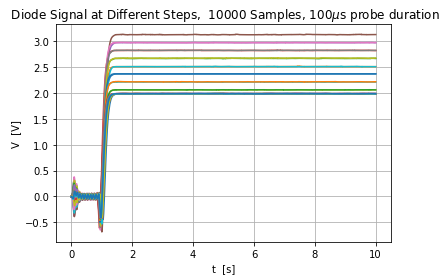

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 1 nano,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-2,2,31)

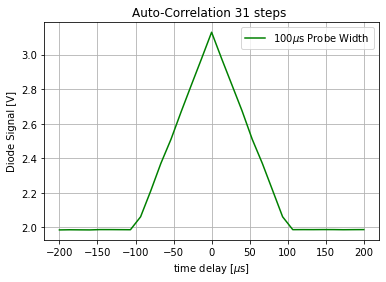

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1 ns Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# Vault

In [ ]:
125000000

In [ ]:
1/0.01

100.0

In [ ]:
0.0055*2

0.011

In [ ]:
1/(5.35e-3*2)

93.45794392523365

In [ ]:
5.35e-3

0.00535

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
div_test(3072000000,6.25e-6)

True

In [ ]:
sol = Gran_find(3071999990,3072000010,6.25e-6)

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
def Mult_find_1GHz(time_length):
    """ goes from lowest Sr to 1GHz
    
    
    
    """
    Sampling_freq_range = np.arange(125000000,1000000000,1)
    sol = np.array((len(Sampling_freq_range)))
    for j,i in (Sampling_freq_range,range(0,len(Sampling_freq_range))):
        if ((j * time_length) % 48 == 0  ):
            sol[i] = j
        else:
            sol[i] = 0

    return sol   

In [ ]:
Mult_find_1GHz(0.005)

ValueError: too many values to unpack (expected 2)

In [ ]:
5e-3

0.005

In [ ]:
48*20

960

In [ ]:
4704/5.35e-3

879252.3364485982

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

In [ ]:
AWG_Settings_10micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':125760000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10micro'
}

In [ ]:
M8190A = VisaR(AWG_Settings_10micro,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_10micro)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [ ]:
Pump_10micro = {
    'Name':'Pump_10micro',
    'Amplitude': 50,
    'Start time':10,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
ProbeA_10micro = {
    'Name':'ProbeA_10micro',
    'Amplitude':20,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [ ]:
ProbeB_10micro= {
    'Name':'ProbeB_10micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
PulseScheme_A_10micro =  {
    'Name' : 'PulseScheme_A_10micro',
    'Pulse Scheme': [Pump_10micro,ProbeA_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10micro'
}

In [ ]:
PulseScheme_B_10micro =  {
    'Name' : 'PulseScheme_B_10micro',
    'Pulse Scheme': [ProbeB_10micro,ProbeB_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10micro'
}

In [ ]:
93

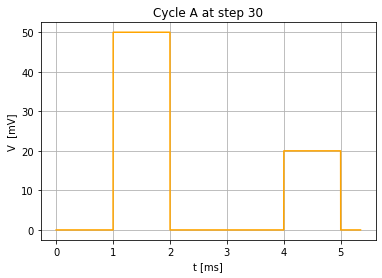

In [ ]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_10micro,30,step,5.35,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1mili.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_10micro = Sweeping_Single_List_File_teil(PulseScheme_A_10micro,30,5.35,sam,0,30,AWG_Settings_1mili,'A')[0]

In [ ]:
sweeping_run_b_10micro = Sweeping_Single_List_File_teil(PulseScheme_B_10micro,30,5.35,sam,0,30,AWG_Settings_1mili,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_10micro_125760000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10micro, k)


with open(r"{dict}\cycleB_31steps_93Hz_10micro_125760000GHz.p".format(dict = PulseScheme_B_10micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_10micro_125760000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as j:
    sweeping_runa_10microicro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10micro_125760000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as f:
    sweeping_runb_10micro= pickle.load(f)

In [ ]:
sweeping_run_a_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
Sequence_File(M8190A,sweeping_runa_10micro['Pulse File Location, at step 30'],sweeping_runb_10micro['Pulse File Location, at step 30'],8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10micro,sweeping_run_b_10micro,PulseScheme_A_10micro['Measurement file Path'],Lock_In_Settings,1)

Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 0 is -0.005428930947626763 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 1 is 2.3446478335686955 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 2 is 2.5550973792204332 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 3 is 2.7866360582131264 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND


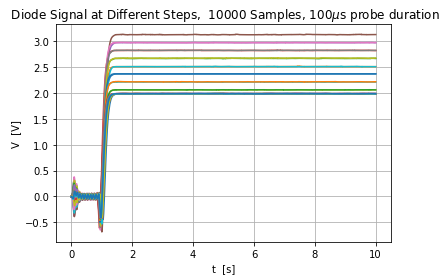

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 10 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-20,20,31)

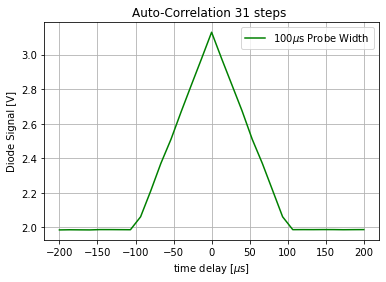

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))